Hello

This is our (Anastasia Sulukhia, Guga Gagloshvili) amazing final project.

When choosing the topic to do the project about, the first idea was to work on next-number prediction in a sequence, which is a very technical and interesting subject in deep learning. Unfortunately, the dataset and the overall task were not satisfactory enough to showcase the knowledge and skills acquired during the course. 

In the end, we decided to work on employee attrition data, which is very popular and also an interesting task that requires multiple steps that can be implemented using tools from the course. popular and also interesting task that requires multiiple steps that can be implemented using tools from the course. 

Additionally, our project focuses on the Employee Attrition & Retention Analytics dataset, which is based on real-world employee data and contains key demographic and job-related attributes. The dataset includes variables such as Age, Attrition (whether an employee left the company), BusinessTravel frequency, DailyRate, Department, DistanceFromHome, Education level and EducationField, as well as identifiers like EmployeeNumber and the constant EmployeeCount. Using these real data features, we analyze patterns related to employee turnover and explore factors that may influence attrition, applying multiple analytical and modeling techniques learned during the course. The goal is to develop an initial understanding of employee attrition by exploring feature distributions, relationships between variables, and potential drivers influencing attrition.

The analysis begins with exploratory data analysis (EDA) to uncover patterns, correlations, and insights across employee attributes. Based on these findings, the dataset is then prepared for machine learning by performing necessary preprocessing steps such as data cleaning, data type conversion, encoding categorical variables, and addressing class imbalance.

This notebook serves as both an analytical exploration of attrition drivers and a foundation for building and evaluating machine learning models in subsequent steps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import numpy as np
import math
import os

In [2]:
# we are initializing logger, so each step executed is documented and is easier to interpret and debug with help of log file produced

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(
    filename="reports/logging.log",
    level=logging.INFO,
    format='%(asctime)s %(levelname)s [%(filename)s:%(lineno)d] %(message)s'
)

logger = logging.getLogger()
logger.info("Logger initialized successfully")

In [3]:
# Starting with data analysis, brief general info on data
data = pd.read_csv('data/data.csv')

print('Data Shape:\n')
print(data.shape)

print('\nColumns:\n')
print(data.columns)

print('\ndata types:\n')
print(data.dtypes)

print('\Statistical summary:\n')
print(data.describe())

print("\nClass distribution (counts):\n")
print(data['Attrition'].value_counts())

logger.info(
f'data successfully read from csv file\n'
f'initial data shape before cleaning: {data.shape}\n'
)

# Attrition - we notice 2 important things, data is clearly very imbalanced and there are invalid values in target column

# Attrition 
# No        1233
# Yes        237
#  10:07       1
#  15:16       1




Data Shape:

(1476, 35)

Columns:

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

data types:

Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education               

<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
/var/folders/nl/9dtj64w923g4gcv88n9h2www0000gn/T/ipykernel_76573/2934470164.py:13: SyntaxWarning: invalid escape sequence '\S'
  print('\Statistical summary:\n')


In [4]:
# now moving onto detailed analysis an data cleaning. first we check for nulls

print(data.isnull().sum())

# we can see that there are exactly same number of nulls in each column - 6. it prob means that there are 6 employees who have null fields,
# so it will be smarter to drop them instead of trying to fill nulls with different approaches. it would introduce too much syntetic data

# checking all columns that have Nans to make sure we are right
print(data[data.isna().any(axis=1)])

# turns out its true, employees 1470 to 1475 have all Nans, so we drop them
data = data.dropna()

# now lets work with target column, remember that it contains some invalid values like timestamps, these rows where ones that contained
# nulls so they are already dropped. for sake of reporting, still writing code for validation

data = data[data['Attrition'].isin(['Yes', 'No'])]

print(data.shape)

logger.info('after cleaning the data from nulls and making sure target column Attribition only contain valid values:' \
f'\nyes or no, result dataset {data.shape}')
# (1476, 35) -> (1470, 35): 6 rows dropped, very much okay


Age                         0
Attrition                   0
BusinessTravel              6
DailyRate                   6
Department                  6
DistanceFromHome            6
Education                   6
EducationField              6
EmployeeCount               6
EmployeeNumber              6
EnvironmentSatisfaction     6
Gender                      6
HourlyRate                  6
JobInvolvement              6
JobLevel                    6
JobRole                     6
JobSatisfaction             6
MaritalStatus               6
MonthlyIncome               6
MonthlyRate                 6
NumCompaniesWorked          6
Over18                      6
OverTime                    6
PercentSalaryHike           6
PerformanceRating           6
RelationshipSatisfaction    6
StandardHours               6
StockOptionLevel            6
TotalWorkingYears           6
TrainingTimesLastYear       6
WorkLifeBalance             6
YearsAtCompany              6
YearsInCurrentRole          6
YearsSince

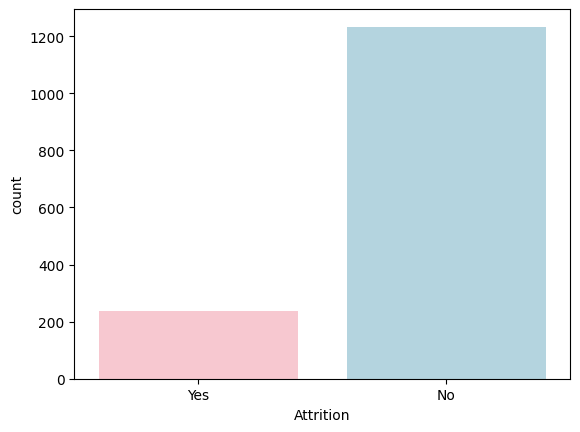

In [ ]:
# now lets check how target column - attrition is distributed

palette = {
    'Yes': 'pink',
    'No': 'lightblue'
}

sns.countplot(
    data=data,
    x='Attrition',
    hue='Attrition',
    palette=palette
)

os.makedirs("reports/figures", exist_ok=True)
plt.savefig("reports/figures/target_class_imbalance_barplot.png")
plt.show()

nos = len(data[data['Attrition'] == 'No'])
yes = len(data[data['Attrition'] == 'Yes'])

logger.info('successfully plot the distributon of target column, which turns out to be extremly imbalanced\n' \
f'number of Yes in Attrition : {yes}, number of No in Attrition : {nos}')

# The dataset exhibits significant class imbalance, with only 16% of employees having left the company. this is a huge problem. 
# class imbalance will lead to high accuracy (mostly predict the majority class), but low F1 score => model will work terribly in production
# i will work on this before starting training   
       

In [6]:
# now we work with data types. making sure columns have according data types

print('initial data types:\n')
print(data.dtypes)

should_be_int_cols = ['Age','EmployeeCount','EmployeeNumber','StandardHours','StockOptionLevel',
            'JobLevel','PerformanceRating','TrainingTimesLastYear','PercentSalaryHike',
            'NumCompaniesWorked']

data[should_be_int_cols] = data[should_be_int_cols].astype('int64')

# converting classification columns to bool for plotting and analysis

data['Attrition'] = data['Attrition'].map({'Yes': True, 'No': False})
data['OverTime'] = data['OverTime'].map({'Yes': True, 'No': False})
data['Over18'] = data['Over18'].map({'Y': True, 'N': False})

print('\nfinal data types\n')
print(data.dtypes)

logger.info('succesfully converted columns to according data types')


initial data types:

Age                          object
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOp

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


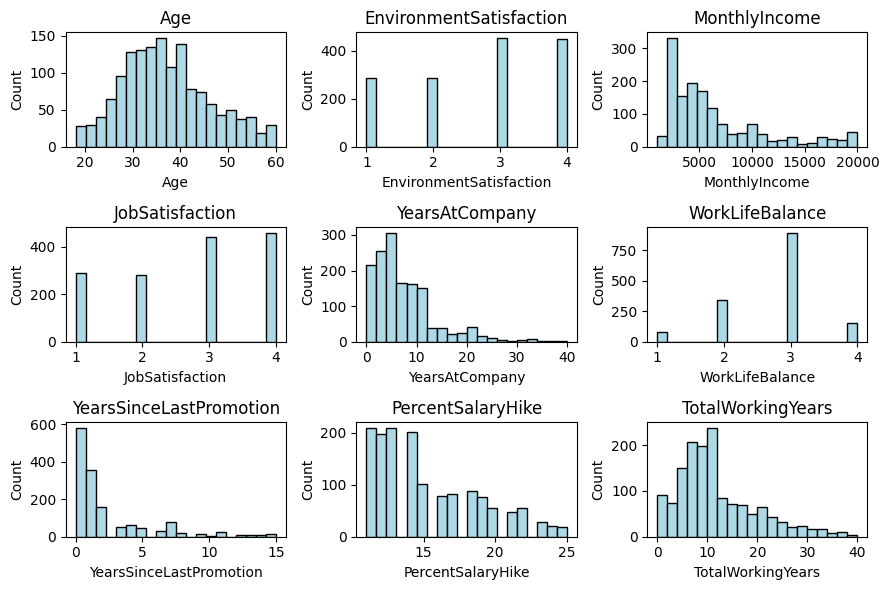

Skewness of important numerical features:

Age                        0.413286
EnvironmentSatisfaction   -0.321654
MonthlyIncome              1.369817
JobSatisfaction           -0.329672
YearsAtCompany             1.764529
WorkLifeBalance           -0.552480
YearsSinceLastPromotion    1.984290
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
dtype: float64


In [7]:
# now we want to check distribution of features that will be used in prediction

print(data.select_dtypes(include=['int64', 'float64']).columns) # numerical columns

# i think these columns are important and will have huge influence on Attrition
important_numerical_columns = [
    'Age', 'EnvironmentSatisfaction', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany',
    'WorkLifeBalance', 'YearsSinceLastPromotion', 'PercentSalaryHike', 'TotalWorkingYears'
]

num_cols = 3
num_rows = (len(important_numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols*3, num_rows*2))  

for i, column in enumerate(important_numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.hist(data[column], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig("reports/figures/feature_distribution_dashboard.png")
plt.show()


skewness = data[important_numerical_columns].skew()
print("Skewness of important numerical features:\n")
print(skewness)
logger.info('succesfully explored distribution of columns important in predictoin')



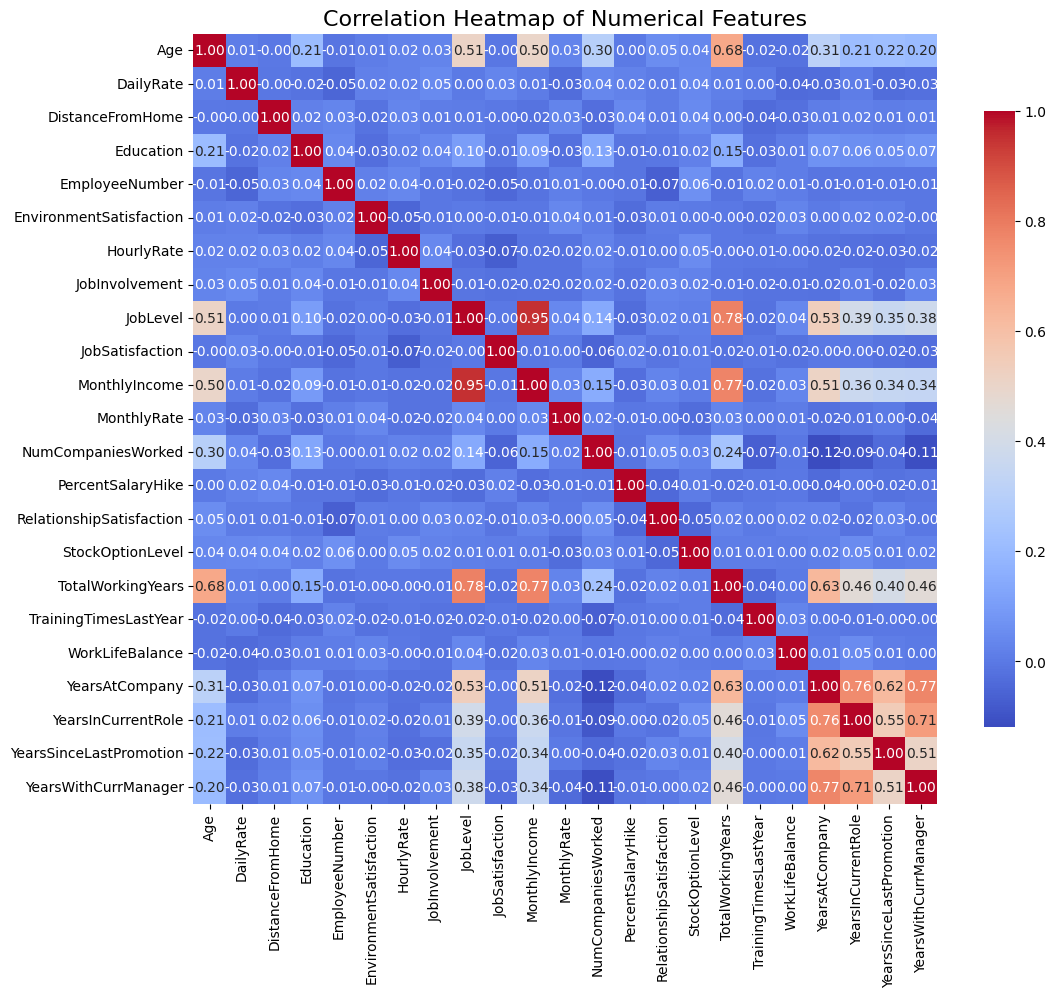

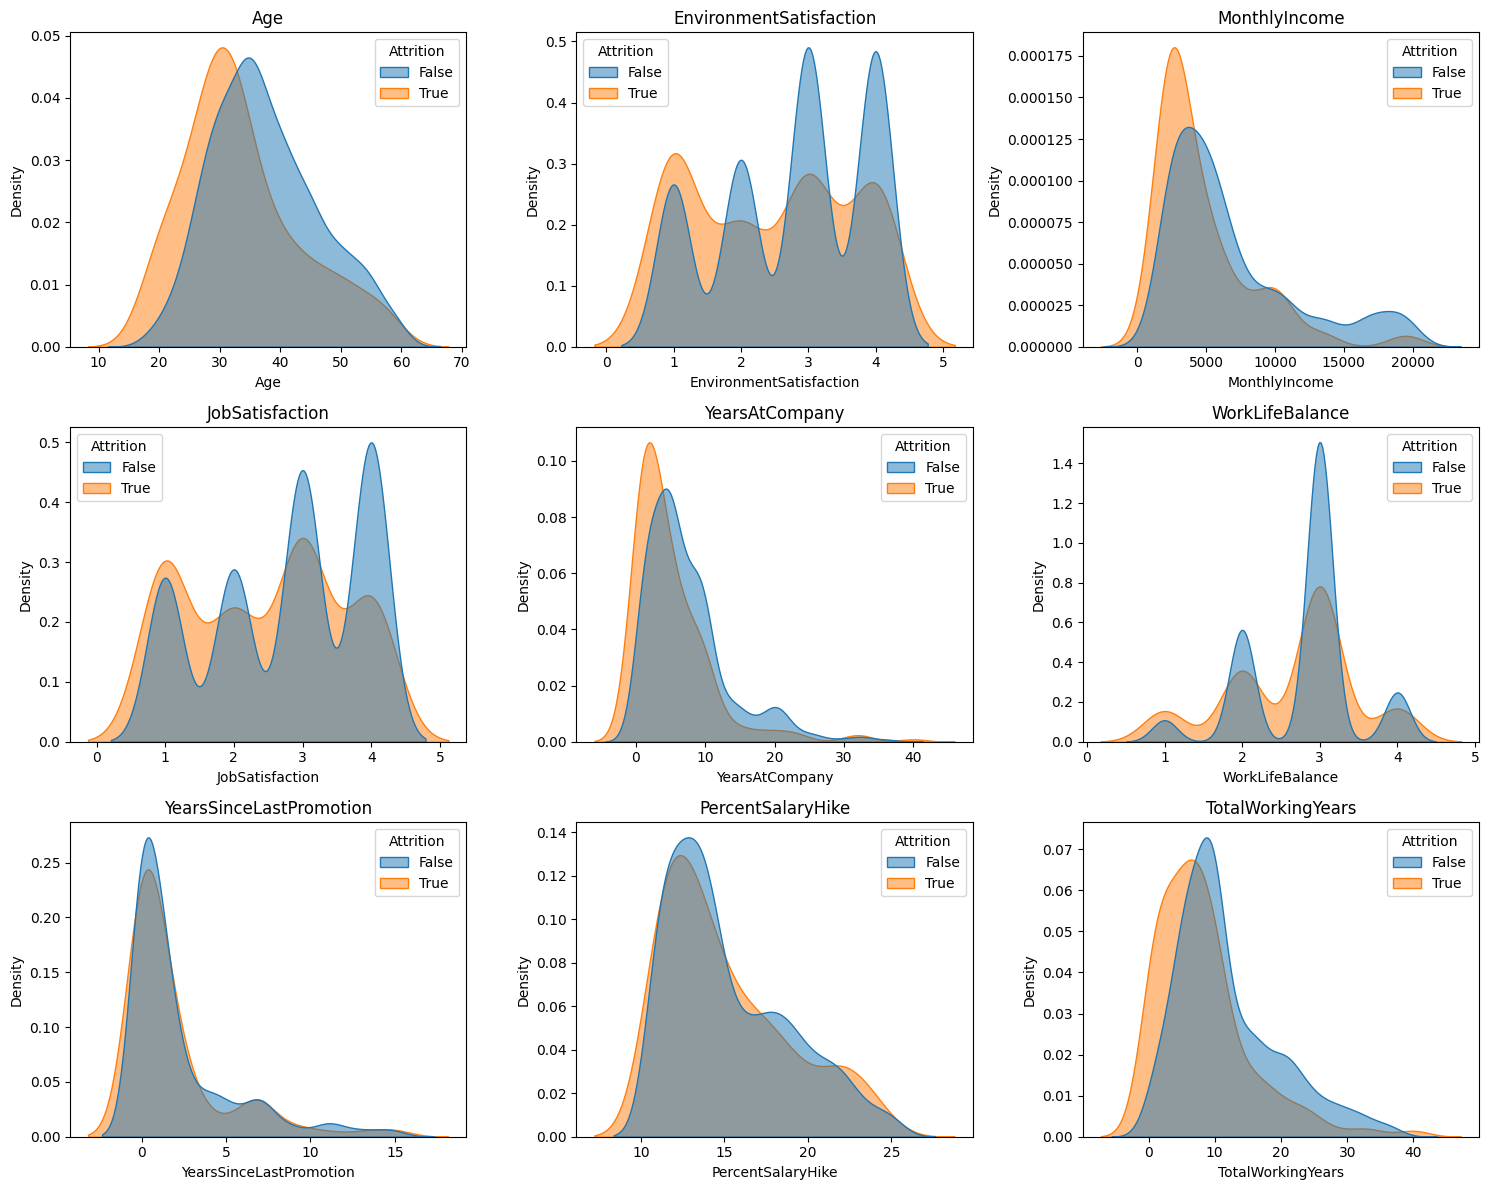

Correlations of numeric features with Attrition:

Age                       NaN
EnvironmentSatisfaction   NaN
MonthlyIncome             NaN
JobSatisfaction           NaN
YearsAtCompany            NaN
WorkLifeBalance           NaN
YearsSinceLastPromotion   NaN
PercentSalaryHike         NaN
TotalWorkingYears         NaN
Name: Attrition, dtype: float64


In [8]:
# Create correlation heatmap for numerical features

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop(['EmployeeCount', 'StandardHours', 'PerformanceRating'])

plt.figure(figsize=(12, 10))
sns.heatmap(
    data[numerical_features].corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f",
    cbar_kws={'shrink': .8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.savefig("reports/figures/correlation_heatmap_of_numerical_features.png")
plt.show()

# Determine subplot grid
n_cols = 3
n_rows = (len(important_numerical_columns) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols*5, n_rows*4))

# KDE plots by Attrition
# Compare feature distributions of Attrition in employees

for i, feature in enumerate(important_numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(
        data=data, 
        x=feature, 
        hue='Attrition', 
        fill=True, 
        common_norm=False, 
        alpha=0.5
    )
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.savefig("reports/figures/KDE_plots_by_Attrition.png")
plt.show()

# Correlations of numeric features with Attrition
attrition_numeric = data['Attrition'].map({'Yes': 1, 'No': 0})

correlations = (
    data[important_numerical_columns]
    .assign(Attrition=attrition_numeric)
    .corr()['Attrition']
    .drop('Attrition')
    .sort_values(ascending=False)
)

top_5 = correlations.abs().sort_values(ascending=False).head(5)

print('Correlations of numeric features with Attrition:\n')
print(correlations)

logger.info(
    'Successfully computed correlations of numerical features.\n'
    f'Top 5 features most strongly associated with attrition:\n{top_5}'
)

The density distributions show that employees who leave tend to have shorter time in company, fewer total working years, and lower job and work-life satisfaction compared to those who stay. Attrition is more concentrated among employees who are earlier in their careers and newer to the company, while longer employement time is associated with higher retention. Lower environment satisfaction and job satisfaction show noticeably higher attrition density, suggesting these are important drivers of employee turnover. In contrast, percent salary hike shows overlap between leavers and stayers, indicating compensation increases alone are less predictive of retention than experience and satisfaction factors. this was somewhat predictable. only thing that suprised me, was the fact that Attrition had somethat same distribution no matter the salary hike

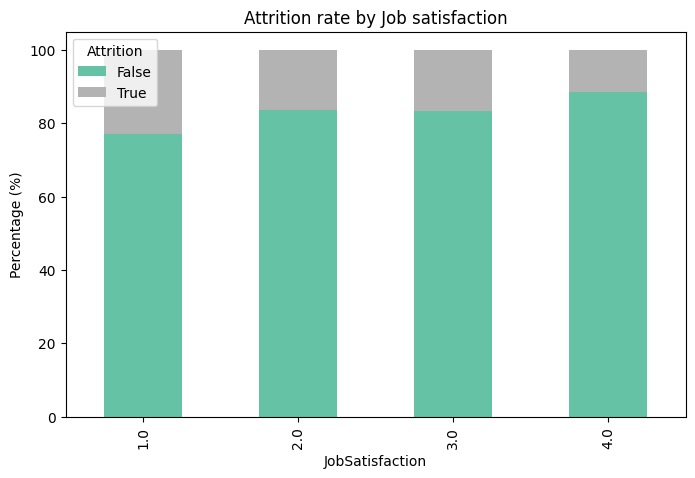

In [9]:
# plot attrition rate by Job satisfaction

employee_attrition = pd.crosstab(data['JobSatisfaction'], data['Attrition'], normalize='index') * 100

employee_attrition.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
plt.title("Attrition rate by Job satisfaction")
plt.ylabel("Percentage (%)")
plt.savefig("reports/figures/attrition_rate_by_job_satisfaction.png")
plt.show()

logger.info('plotted past vs acrive employees by job satisfaction'
'showing more astisfaction with job -> less likely to leave')

# we see, more astisfaction with job -> less likely to leave

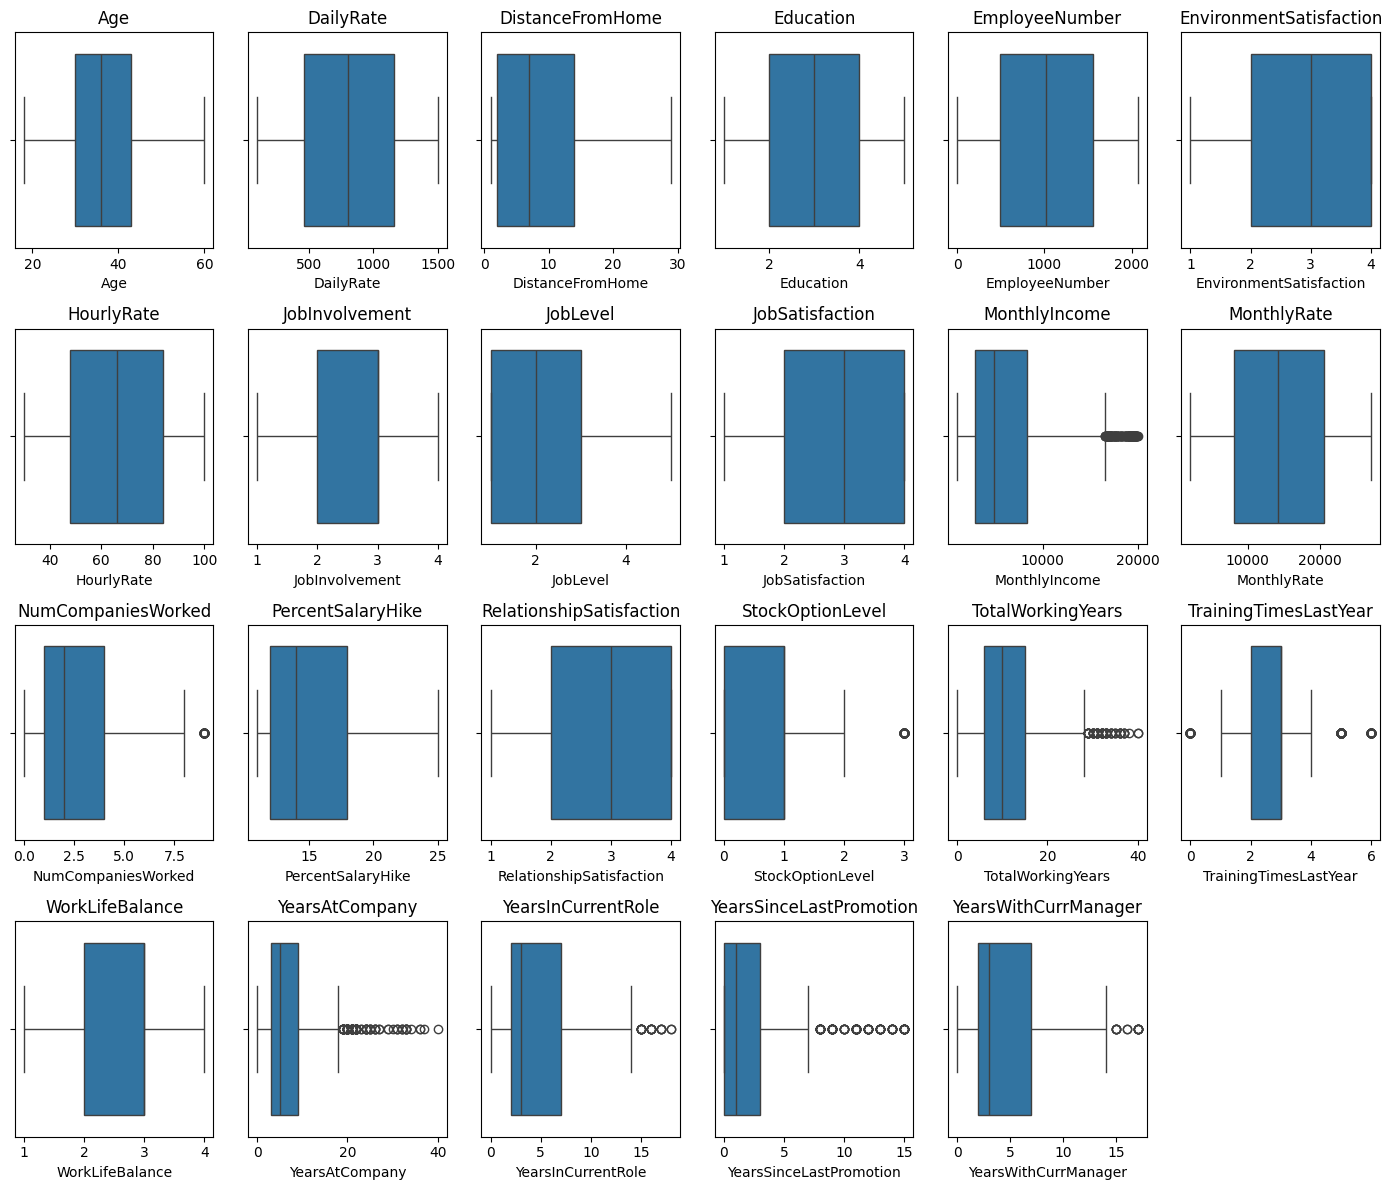

In [10]:
# Detection of outliers in specified columns using the interquartile range (IQR)
# now i will plot boxplots for some numerical features to see outliers. 

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

n_cols = 6
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 3 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(feature)

# Remove empty subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("reports/figures/feature_outliers.png")
plt.show()

logger.info('we are discovering outliers in numerical features. most of them do not have outliers, but the ones with them we have left untouched.\n'
'\nThey are not errors - they are important edge cases model needs to learn.')

# there are near 100 outliers in terms of monthly income, median being 5k and outliers laying in range 15k-20k
# but these outliers are not data errors but important features that model will use to learn and then make correct
# predictions for highincome people



most of the numerical columns do not contain outliers, but the ones containing should not be cleaned. it is important that such cases are in the training, so model predicts high earners, long time employees attrition correctly. They're not errors - they're important edge cases model needs to learn.

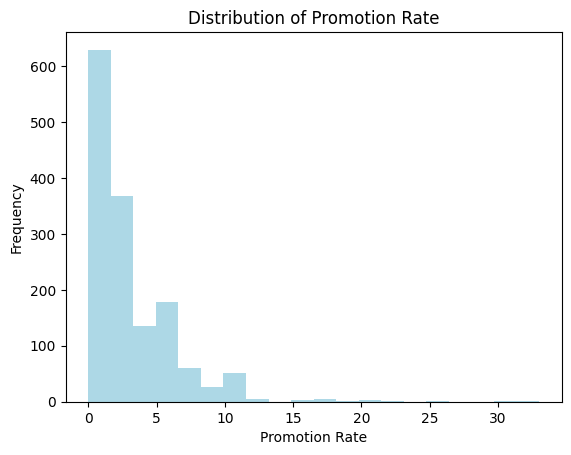

In [11]:
# we thought a lot what feature to engineer and add that would help the model, and we decided on PromotionRate, YearsAtCompany / (YearsSinceLastPromotion + 1) measuring career mobility

data['PromotionRate'] = np.round(data['YearsAtCompany'] / (data['YearsSinceLastPromotion'] + 1), 3)

logger.info('we engineered new feature promotion rate, larger the rate, more often the employee is promoted')
# now lets see distribution of promotion rate

plt.hist(data['PromotionRate'], bins=20, color='lightblue')
plt.xlabel('Promotion Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Promotion Rate')
plt.savefig("reports/figures/distribution_of_promotion_rate.png")
plt.show()

# Save the updated DataFrame back to CSV


okay, moving onto preparing data for machine learning. we drop columns that do not contribute to predicton and are redudant. like IDs, columns that
are calculated by other columns like over18 calculated by age...

In [12]:
# now we drop columns that do not have any significance like ids and derived columns that are calculated by others like  age -> over18

data = data.drop(columns=['EmployeeNumber', 'EmployeeCount' , 'Over18', 'StandardHours'])

In [13]:
# now we move onto encoding columns using one hot encoding
data['Attrition'] = data['Attrition'].astype(int)
data['OverTime'] = data['OverTime'].astype(int)

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [14]:
# saving updated data that ML models will work on

data.to_csv('data/data_updated.csv', index=False)